## The attached code is a run of the linear regression model on data from booking without the addition of new features

Linear Regression Results:
Train R2: 0.9010273801913667
Train RMSE: 125.7266693710131
Train MSE: 15807.195391128045
Train MAE: 89.28998557840278
Test R2: 0.8983174514739303
Test RMSE: 128.67719778272735
Test MSE: 16557.821229215133
Test MAE: 91.02113649393777


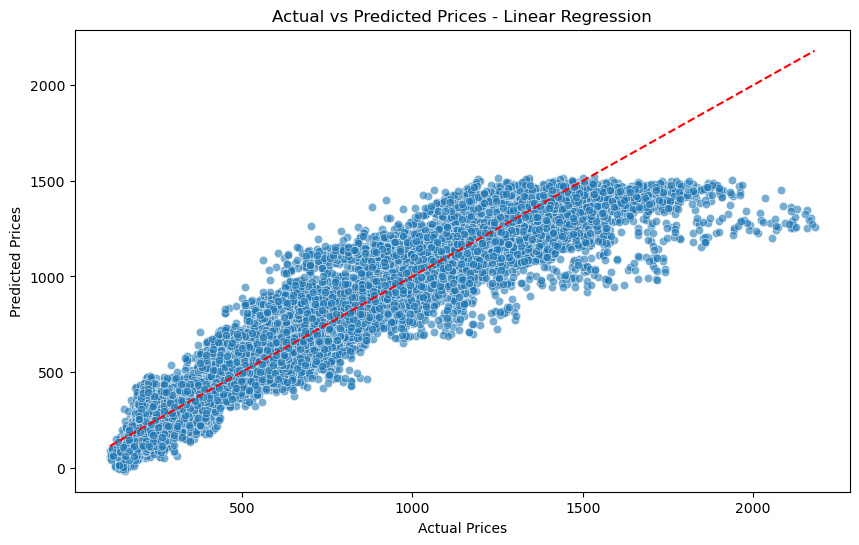

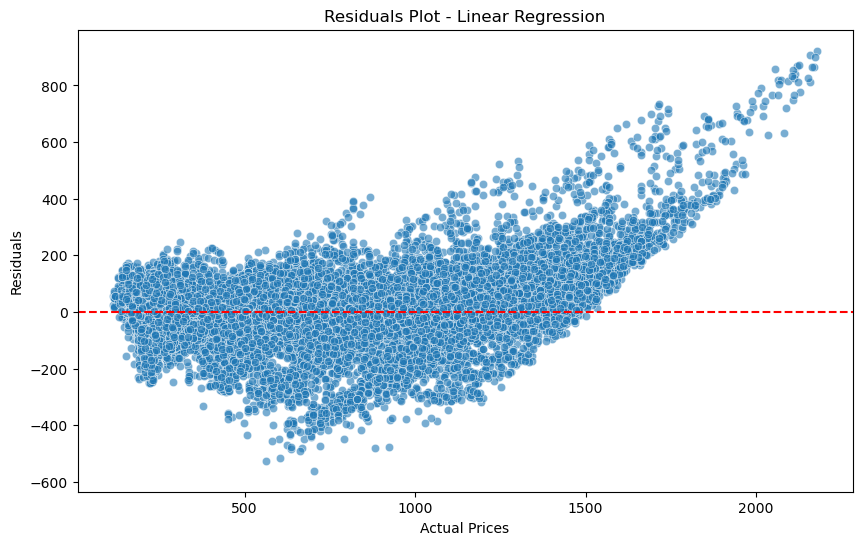

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df1 = pd.read_csv('./0507_cleaned_booking_hotels.csv')
df2 = pd.read_csv('./2506_cleaned_booking_hotels.csv')
df3 = pd.read_csv('./20_06_hotels_data_cleaned.csv')

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

# Function to fill NaN values with the mean of the group
def fill_na_with_group_mean(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

# Fill NaN values for the entire dataset
df = fill_na_with_group_mean(df)

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Remove the price column
if 'price_per_night' in df.columns:
    df = df.drop(columns=['price_per_night'])

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data into train and test sets
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training metrics
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Test metrics
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print results
print("Linear Regression Results:")
print(f"Train R2: {train_r2}")
print(f"Train RMSE: {train_rmse}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Test R2: {test_r2}")
print(f"Test RMSE: {test_rmse}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()


# Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot - Linear Regression')
plt.show()

## The attached code is a run of the linear regression model on booking data with additions of new features and after we have done one hot encoding for them (a period of the month - beginning, middle and end, day of the week of check in, day of the week of check out)

Linear Regression Results:
Train R2: 0.9234282242713254
Train RMSE: 112.70626469018787
Train MSE: 12702.702100414688
Train MAE: 78.26135872548977
Test R2: 0.9241659672602782
Test RMSE: 113.40147120918654
Test MSE: 12859.893672407963
Test MAE: 78.2635837651546


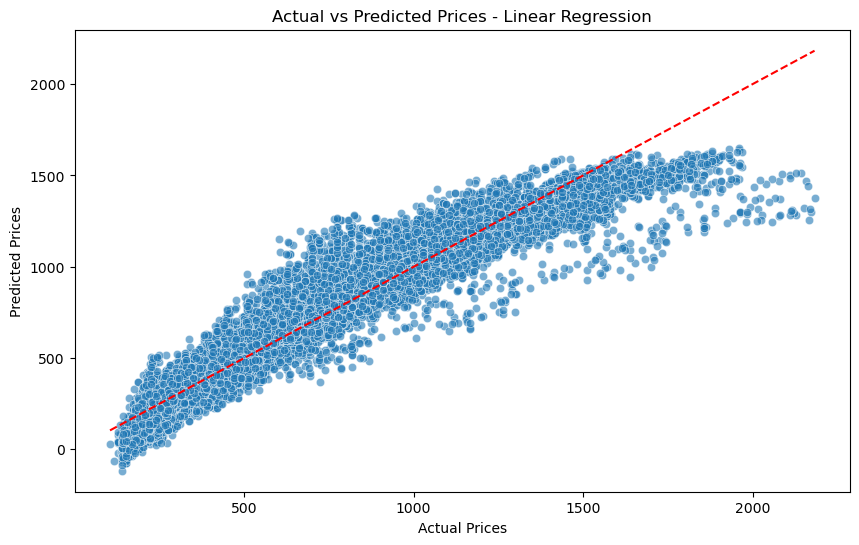

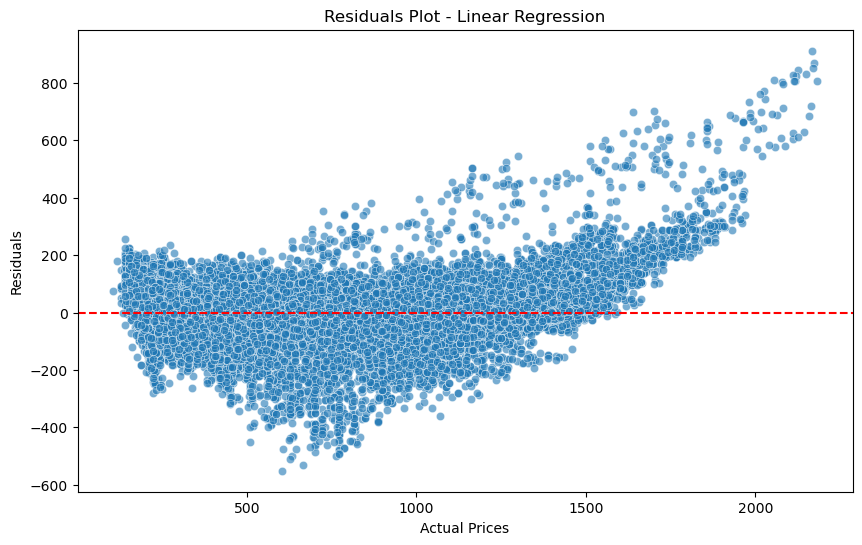

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df1 = pd.read_csv('./05_07_hotels_data_cleaned_with_days_name_parameters_period_encoded.csv')
df2 = pd.read_csv('./25_06_hotels_data_cleaned_with_days_name_parameters_period_encoded.csv')
df3 = pd.read_csv('./20_06_hotels_data_cleaned_with_new_parameters_encoded.csv')

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

# Function to fill NaN values with the mean of the group
def fill_na_with_group_mean(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

# Fill NaN values for the entire dataset
df = fill_na_with_group_mean(df)

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Remove the price column
if 'price_per_night' in df.columns:
    df = df.drop(columns=['price_per_night'])

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data into train and test sets
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training metrics
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Test metrics
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print results
print("Linear Regression Results:")
print(f"Train R2: {train_r2}")
print(f"Train RMSE: {train_rmse}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Test R2: {test_r2}")
print(f"Test RMSE: {test_rmse}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()


# Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot - Linear Regression')
plt.show()

### Summary and conclusions:

The R2 SCORE scores both in training and in the test are around 0.90, which means that the chance of overfit is very low and the results look very good in this respect also in the other parameters
RMSE, MSE, and MAE. Regarding the performance of the model itself, although its performance in general is good, there were models that worked better on the existing data and we can assume that this is because the specific model of linear regression is more sensitive to anomalies in the data.

Another thing that can be understood from running the original clean data compared to the data with the new features we added and of which we did one hot encoding is that the new features we added do improve the performance of the model similar to the other models we ran,but not significantly as in other models such as decision tree and neural networks.